# Problem Statement #1:
- Build a sequential model to classify names into gender.
- Input to the model will be a name, i.e. a sequence of characters.
- Use one hot representation of the  characters.
-Remove non-ascii characters, if there are any.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, RNN, SimpleRNN, GRU
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
input = pd.read_csv("name_gender.csv", header=0,names=['name','gender','p'])
input.drop('p', axis=1, inplace=True)
# input = input.sample(frac=0.25, replace=False, random_state=42)
print(input.shape)

(95026, 2)


In [ ]:
names = input['name'].str.encode('ascii', 'ignore').str.decode('ascii') # Removing non-Ascii characters
gender = input['gender']
vocab = set(' '.join([str(i) for i in names]))
vocab.add('END')
len_vocab = len(vocab)

In [ ]:
print('Vocab size: {}'.format(len_vocab))
names_len = [len(name) for name in names]
longest = max(names_len)
print("Longest name size: {}".format(longest))
average = np.mean(names_len)
print("Average name size: {}".format(average))
stdev = np.std(names_len)
print("Stdev of name size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max name size: {}'.format(max_len))

Vocab size: 54
Longest name size: 15
Average name size: 6.5340959316397615
Stdev of name size: 1.4860708016510187
Max name size: 10


In [ ]:
print(vocab)
print("vocab length is ",len_vocab)
print ("length of input is ",len(input))

{'L', 'a', ' ', 'F', 'I', 'T', 'f', 'g', 'c', 'e', 'z', 'S', 'v', 'o', 'r', 'C', 'K', 'O', 'x', 'Q', 'b', 'R', 'u', 'W', 'p', 'B', 'H', 'M', 'V', 'Z', 's', 'm', 'q', 't', 'A', 'E', 'j', 'P', 'k', 'w', 'Y', 'D', 'N', 'J', 'U', 'X', 'END', 'h', 'i', 'd', 'G', 'n', 'y', 'l'}
vocab length is  54
length of input is  95026


In [ ]:
char_index = dict((c, i) for i, c in enumerate(vocab))

In [ ]:
print(char_index)

{'L': 0, 'a': 1, ' ': 2, 'F': 3, 'I': 4, 'T': 5, 'f': 6, 'g': 7, 'c': 8, 'e': 9, 'z': 10, 'S': 11, 'v': 12, 'o': 13, 'r': 14, 'C': 15, 'K': 16, 'O': 17, 'x': 18, 'Q': 19, 'b': 20, 'R': 21, 'u': 22, 'W': 23, 'p': 24, 'B': 25, 'H': 26, 'M': 27, 'V': 28, 'Z': 29, 's': 30, 'm': 31, 'q': 32, 't': 33, 'A': 34, 'E': 35, 'j': 36, 'P': 37, 'k': 38, 'w': 39, 'Y': 40, 'D': 41, 'N': 42, 'J': 43, 'U': 44, 'X': 45, 'END': 46, 'h': 47, 'i': 48, 'd': 49, 'G': 50, 'n': 51, 'y': 52, 'l': 53}


In [ ]:
def set_flag(i):
    tmp = np.zeros(len_vocab);
    tmp[i] = 1
    return(tmp)

In [ ]:
#take input upto max and truncate rest
#encode to vector space(one hot encoding)
#padd 'END' to shorter sequences
#also convert each index to one-hot encoding
X = []
y = []
trunc_names = [str(i)[0:max_len] for i in names]
for i in trunc_names:
    tmp = [set_flag(char_index[j]) for j in str(i)]
    for k in range(0,max_len - len(str(i))):
        tmp.append(set_flag(char_index["END"]))
    X.append(tmp)
for i in gender:
    if i == 'M':
        y.append([1,0])
    else:
        y.append([0,1])

In [ ]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(95026, 10, 54)
(95026, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the effect of the following on the accuracy:
RNN cells - Simple RNN, LSTM and GRU

1. Simple RNN.

In [ ]:
#build the model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, return_sequences=True, input_shape=(max_len,len_vocab)))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32, return_sequences=False))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(2))
model_rnn.add(Activation('softmax'))
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=2000
model_rnn.fit(X_train, y_train,batch_size=batch_size,epochs=20)

Epoch 1/20
39/39 [==============================] - 3s 66ms/step - loss: 0.6206 - accuracy: 0.6645
Epoch 2/20
39/39 [==============================] - 3s 67ms/step - loss: 0.5090 - accuracy: 0.7557
Epoch 3/20
39/39 [==============================] - 3s 68ms/step - loss: 0.4840 - accuracy: 0.7723
Epoch 4/20
39/39 [==============================] - 3s 68ms/step - loss: 0.4676 - accuracy: 0.7851
Epoch 5/20
39/39 [==============================] - 3s 67ms/step - loss: 0.4606 - accuracy: 0.7897
Epoch 6/20
39/39 [==============================] - 3s 67ms/step - loss: 0.4457 - accuracy: 0.8002
Epoch 7/20
39/39 [==============================] - 3s 68ms/step - loss: 0.4360 - accuracy: 0.8032
Epoch 8/20
39/39 [==============================] - 3s 68ms/step - loss: 0.4257 - accuracy: 0.8112
Epoch 9/20
39/39 [==============================] - 3s 68ms/step - loss: 0.4175 - accuracy: 0.8131
Epoch 10/20
39/39 [==============================] - 3s 67ms/step - loss: 0.4070 - accuracy: 0.8195
Epoch 11/

In [ ]:
_, acc = model_rnn.evaluate(X_test, y_test)
print('Test accuracy:', acc)

594/594 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8413
Test accuracy: 0.8412606716156006


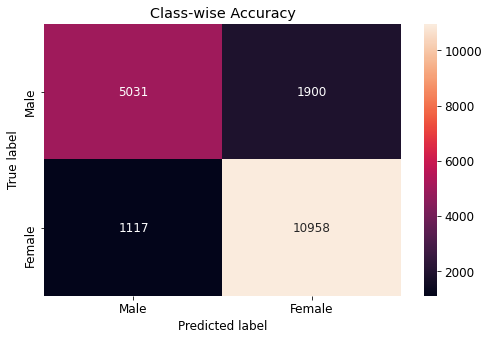

In [ ]:
preds = model_rnn.predict(X_test, batch_size)
class_names = ['Male', 'Female']

# Creates a confusion matrix
cm = confusion_matrix([np.argmax(y) for y in y_test], [np.argmax(pred) for pred in preds]) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = class_names, 
                     columns = class_names)
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Class-wise Accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.rcParams['font.size'] = 12
plt.show()

2. LSTM.

In [ ]:
#build the model
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(max_len,len_vocab)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(2))
model_lstm.add(Activation('softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=2000
model_lstm.fit(X_train, y_train,batch_size=batch_size,epochs=20)

Epoch 1/20
39/39 [==============================] - 6s 158ms/step - loss: 0.6324 - accuracy: 0.6394
Epoch 2/20
39/39 [==============================] - 6s 164ms/step - loss: 0.5494 - accuracy: 0.7172
Epoch 3/20
39/39 [==============================] - 6s 165ms/step - loss: 0.5005 - accuracy: 0.7616
Epoch 4/20
39/39 [==============================] - 6s 165ms/step - loss: 0.4718 - accuracy: 0.7824
Epoch 5/20
39/39 [==============================] - 6s 165ms/step - loss: 0.4556 - accuracy: 0.7943
Epoch 6/20
39/39 [==============================] - 7s 167ms/step - loss: 0.4364 - accuracy: 0.8037
Epoch 7/20
39/39 [==============================] - 6s 165ms/step - loss: 0.4189 - accuracy: 0.8139
Epoch 8/20
39/39 [==============================] - 6s 166ms/step - loss: 0.4025 - accuracy: 0.8236
Epoch 9/20
39/39 [==============================] - 6s 166ms/step - loss: 0.3926 - accuracy: 0.8285
Epoch 10/20
39/39 [==============================] - 6s 165ms/step - loss: 0.3818 - accuracy: 0.8335

In [ ]:
_, acc = model_lstm.evaluate(X_test, y_test)
print('Test accuracy:', acc)

594/594 [==============================] - 2s 3ms/step - loss: 0.3439 - accuracy: 0.8464
Test accuracy: 0.8464169502258301


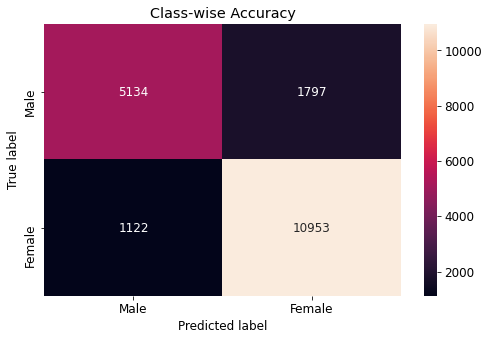

In [ ]:
preds = model_lstm.predict(X_test, batch_size)
class_names = ['Male', 'Female']

# Creates a confusion matrix
cm = confusion_matrix([np.argmax(y) for y in y_test], [np.argmax(pred) for pred in preds]) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = class_names, 
                     columns = class_names)
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Class-wise Accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.rcParams['font.size'] = 12
plt.show()

3. GRU.

In [ ]:
#build the model
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape=(max_len,len_vocab)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(32, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(2))
model_gru.add(Activation('softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=2000
model_gru.fit(X_train, y_train,batch_size=batch_size,epochs=20)

Epoch 1/20
39/39 [==============================] - 6s 145ms/step - loss: 0.6421 - accuracy: 0.6188
Epoch 2/20
39/39 [==============================] - 6s 144ms/step - loss: 0.5246 - accuracy: 0.7398
Epoch 3/20
39/39 [==============================] - 6s 145ms/step - loss: 0.4599 - accuracy: 0.7886
Epoch 4/20
39/39 [==============================] - 6s 146ms/step - loss: 0.4300 - accuracy: 0.8057
Epoch 5/20
39/39 [==============================] - 6s 144ms/step - loss: 0.4006 - accuracy: 0.8246
Epoch 6/20
39/39 [==============================] - 6s 142ms/step - loss: 0.3848 - accuracy: 0.8317
Epoch 7/20
39/39 [==============================] - 6s 144ms/step - loss: 0.3807 - accuracy: 0.8338
Epoch 8/20
39/39 [==============================] - 5s 141ms/step - loss: 0.3712 - accuracy: 0.8393
Epoch 9/20
39/39 [==============================] - 6s 142ms/step - loss: 0.3654 - accuracy: 0.8410
Epoch 10/20
39/39 [==============================] - 5s 140ms/step - loss: 0.3651 - accuracy: 0.8414

In [ ]:
_, acc = model_gru.evaluate(X_test, y_test)
print('Test accuracy:', acc)

594/594 [==============================] - 2s 3ms/step - loss: 0.3318 - accuracy: 0.8554
Test accuracy: 0.855414092540741


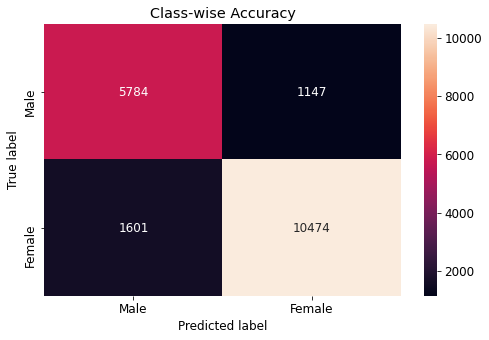

In [ ]:
preds = model_gru.predict(X_test, batch_size)
class_names = ['Male', 'Female']

# Creates a confusion matrix
cm = confusion_matrix([np.argmax(y) for y in y_test], [np.argmax(pred) for pred in preds]) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = class_names, 
                     columns = class_names)
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Class-wise Accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.rcParams['font.size'] = 12
plt.show()

# 2. Dataset size (Randomly select 25%, 50%, 75% and 100% of the data).

I will use the GRU model for all portions as it showed best accuracy on step 1.

Original X shape: (95026, 10, 54), original y shape: (95026, 2)
New X shape: (23756, 10, 54), New y shape: (23756, 2)
149/149 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8487
Test accuracy for 25% of the data:84.870%


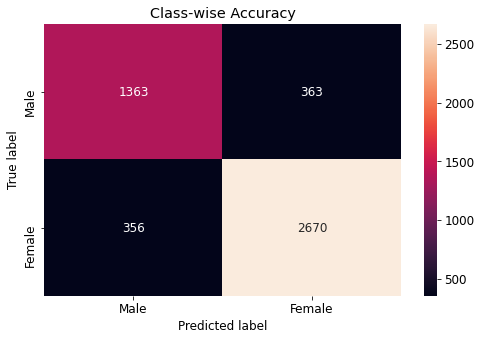

New X shape: (47513, 10, 54), New y shape: (47513, 2)
297/297 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8328
Test accuracy for 50% of the data:83.279%


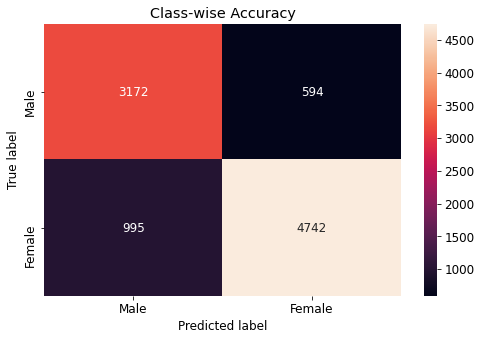

New X shape: (71270, 10, 54), New y shape: (71270, 2)
446/446 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.8624
Test accuracy for 75% of the data:86.235%


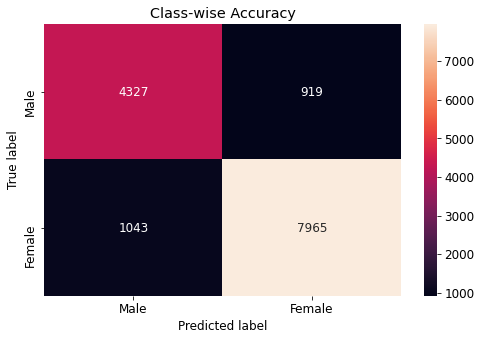

New X shape: (95026, 10, 54), New y shape: (95026, 2)
594/594 [==============================] - 2s 3ms/step - loss: 0.3593 - accuracy: 0.8407
Test accuracy for 100% of the data:84.068%


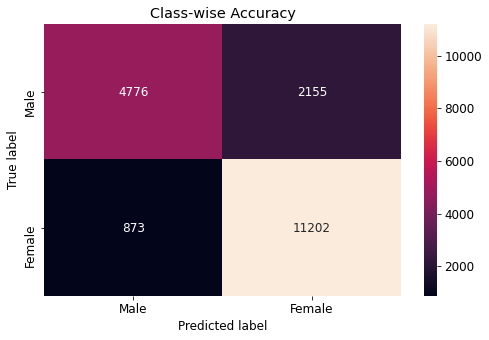

In [ ]:
print(f'Original X shape: {X.shape}, original y shape: {y.shape}')
class_names = ['Male', 'Female']
for i in range(1, 5):
    size = round(i*0.25*X.shape[0])
    new_X, new_y = X[:size], y[:size]
    print(f'New X shape: {new_X.shape}, New y shape: {new_y.shape}')
    X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
    #build the model
    model_gru = Sequential()
    model_gru.add(GRU(64, return_sequences=True, input_shape=(max_len,len_vocab)))
    model_gru.add(Dropout(0.2))
    model_gru.add(GRU(32, return_sequences=False))
    model_gru.add(Dropout(0.2))
    model_gru.add(Dense(2))
    model_gru.add(Activation('softmax'))
    model_gru.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    batch_size=2000
    model_gru.fit(X_train, y_train,batch_size=batch_size,epochs=20, verbose=0)
    _, acc = model_gru.evaluate(X_test, y_test)
    print(f'Test accuracy for {i*25}% of the data:{acc*100:.3f}%')
    preds = model_gru.predict(X_test, batch_size, verbose=0)
    cm = confusion_matrix([np.argmax(y) for y in y_test], [np.argmax(pred) for pred in preds]) 
    cm_df = pd.DataFrame(cm,
                        index = class_names, 
                        columns = class_names)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm_df, annot=True, fmt='g')
    plt.title('Class-wise Accuracy')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams['font.size'] = 12
    plt.show()

# Problem Statment #2
- Train a language model using these names. 
- Generate 20 male names and 20 female names.

In [ ]:
data = '\n'.join(input.name.str.lower().values)
chars = list(set('\n'.join(data)))
data_size, vocab_size = len(data), len(chars)

In [ ]:
data[:100]

'aaban\naabha\naabid\naabriella\naada\naadam\naadan\naadarsh\naaden\naadesh\naadhav\naadhavan\naadhi\naadhira\naadh'

In [ ]:
input_names = input.name.values
# Build translation dictionaries, 'a' -> 0, 0 -> 'a'
char2idx = dict((c, i) for i, c in enumerate(chars))
idx2char = dict((i, c) for i, c in enumerate(chars))

# Use longest name length as our sequence window
max_sequence_length = max([len(name) for name in input_names])

print(f'Total chars: {vocab_size}')
print('Corpus length:', len(data))
print('Number of names: ', len(input_names))
print('Longest name: ', max_sequence_length)

Total chars: 27
Corpus length: 715934
Number of names:  95026
Longest name:  15


In [ ]:
sequences = []
next_chars = []
step_length = 1
# Loop over our data and extract pairs of sequances and next chars
for i in range(0, len(data) - max_sequence_length, step_length):
    sequences.append(data[i: i + max_sequence_length])
    next_chars.append(data[i + max_sequence_length])

num_sequences = len(sequences)

print(f'Number of sequences: {num_sequences}')
print('First 10 sequences and next chars:')
for i in range(10):
    print('X=[{}]   y=[{}]'.replace('\n', ' ').format(sequences[i], next_chars[i]).replace('\n', ' '))

Number of sequences: 715919
First 10 sequences and next chars:
X=[aaban aabha aab]   y=[i]
X=[aban aabha aabi]   y=[d]
X=[ban aabha aabid]   y=[ ]
X=[an aabha aabid ]   y=[a]
X=[n aabha aabid a]   y=[a]
X=[ aabha aabid aa]   y=[b]
X=[aabha aabid aab]   y=[r]
X=[abha aabid aabr]   y=[i]
X=[bha aabid aabri]   y=[e]
X=[ha aabid aabrie]   y=[l]


In [ ]:
X = np.zeros((num_sequences, max_sequence_length, vocab_size), dtype=np.bool)
Y = np.zeros((num_sequences, vocab_size), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for j, char in enumerate(sequence):
        X[i, j, char2idx[char]] = 1
    Y[i, char2idx[next_chars[i]]] = 1
    
print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')

X shape: (715919, 15, 27)
Y shape: (715919, 27)


In [ ]:
from keras.optimizers import RMSprop
model = Sequential()
model.add(LSTM(64, input_shape=(max_sequence_length, vocab_size), recurrent_dropout=0.2))
model.add(Dense(units=vocab_size, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer)

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 64)                23552     
_________________________________________________________________
dense_20 (Dense)             (None, 27)                1755      
Total params: 25,307
Trainable params: 25,307
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = model.fit(X, Y, epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
700/700 [==============================] - 86s 123ms/step - loss: 1.4927
Epoch 2/50
700/700 [==============================] - 84s 120ms/step - loss: 1.0014
Epoch 3/50
700/700 [==============================] - 83s 119ms/step - loss: 0.9282
Epoch 4/50
700/700 [==============================] - 83s 118ms/step - loss: 0.8916
Epoch 5/50
700/700 [==============================] - 83s 118ms/step - loss: 0.8684
Epoch 6/50
700/700 [==============================] - 83s 118ms/step - loss: 0.8544
Epoch 7/50
700/700 [==============================] - 83s 119ms/step - loss: 0.8433
Epoch 8/50
700/700 [==============================] - 84s 119ms/step - loss: 0.8351
Epoch 9/50
700/700 [==============================] - 84s 119ms/step - loss: 0.8293
Epoch 10/50
700/700 [==============================] - 83s 119ms/step - loss: 0.8245
Epoch 11/50
700/700 [==============================] - 83s 118ms/step - loss: 0.8211
Epoch 12/50
700/700 [==============================] - 83s 118ms/step - lo

In [ ]:
gen_amount = 40
# Start sequence generation from end of the input sequence
sequence = data[-(max_sequence_length - 1):] + '\n'

male_names = []
female_names = []

print(f'{gen_amount} new names are being generated.')

while len(male_names) < 20 or len(female_names) < 20:
    
    # Vectorize sequence for prediction
    x = np.zeros((1, max_sequence_length, vocab_size))
    for i, char in enumerate(sequence):
        x[0, i, char2idx[char]] = 1

    # Sample next char from predicted probabilities
    probs = model.predict(x, verbose=0)[0]
    probs /= probs.sum()
    next_idx = np.random.choice(len(probs), p=probs)   
    next_char = idx2char[next_idx]   
    sequence = sequence[1:] + next_char

    # New line means we have a new name
    if next_char == '\n':
        gen_name = [name for name in sequence.split('\n')][1]
        trunc_name = gen_name[0:max_len]
        tmp = [set_flag(char_index[j]) for j in str(trunc_name)]
        for k in range(0,max_len - len(str(trunc_name))):
            tmp.append(set_flag(char_index["END"]))
        pred = model_gru.predict(np.expand_dims(np.array(tmp), 0))
        if np.argmax(pred) == 0 and len(male_names) < 20:
            male_names.append(gen_name)
            print('Generated {} male names'.format(len(male_names)))
        elif np.argmax(pred) == 1 and len(female_names) < 20:
            female_names.append(gen_name)
            print('Generated {} female names'.format(len(female_names)))

40 new names are being generated.
Generated 1 female names
Generated 2 female names
Generated 1 male names
Generated 3 female names
Generated 4 female names
Generated 5 female names
Generated 6 female names
Generated 7 female names
Generated 8 female names
Generated 9 female names
Generated 10 female names
Generated 2 male names
Generated 3 male names
Generated 11 female names
Generated 12 female names
Generated 4 male names
Generated 5 male names
Generated 13 female names
Generated 14 female names
Generated 6 male names
Generated 15 female names
Generated 16 female names
Generated 17 female names
Generated 18 female names
Generated 19 female names
Generated 20 female names
Generated 7 male names
Generated 8 male names
Generated 9 male names
Generated 10 male names
Generated 11 male names
Generated 12 male names
Generated 13 male names
Generated 14 male names
Generated 15 male names
Generated 16 male names
Generated 17 male names
Generated 18 male names
Generated 19 male names
Generate

In [ ]:
male_names

['udis',
 'idan',
 'idan',
 'idanjian',
 'idanjian',
 'idan',
 'iaman',
 'iamual',
 'iamio',
 'eamodo',
 'eamodo',
 'eamrod',
 'eamion',
 'eamir',
 'edair',
 'edaiman',
 'edan',
 'edanser',
 'edasterios',
 'edather']

In [ ]:
female_names

['utne',
 'utne',
 'idivicka',
 'idka',
 'idka',
 'idka',
 'idkra',
 'idalynn',
 'idalynn',
 'idalynn',
 'idann',
 'idannah',
 'idal',
 'idal',
 'idana',
 'ida',
 'idaamathiya',
 'iamanta',
 'iamathawn',
 'iamath']

# Problem Statement #2a
- Train a language model using names starting with A, M, and Z.
- Generate 50 names.

In [ ]:
data = '\n'.join([name for name in input.name if name[0] in ['A', 'M', 'Z']])
chars = list(set('\n'.join(data)))
data_size, vocab_size = len(data), len(chars)

In [ ]:
data[:100]

'Aaban\nAabha\nAabid\nAabriella\nAada\nAadam\nAadan\nAadarsh\nAaden\nAadesh\nAadhav\nAadhavan\nAadhi\nAadhira\nAadh'

In [ ]:
input_names = input.name.values
# Build translation dictionaries, 'a' -> 0, 0 -> 'a'
char2idx = dict((c, i) for i, c in enumerate(chars))
idx2char = dict((i, c) for i, c in enumerate(chars))

# Use longest name length as our sequence window
max_sequence_length = max([len(name) for name in input_names])

print(f'Total chars: {vocab_size}')
print('Corpus length:', len(data))
print('Number of names: ', len(input_names))
print('Longest name: ', max_sequence_length)

Total chars: 30
Corpus length: 144384
Number of names:  95026
Longest name:  15


In [ ]:
sequences = []
next_chars = []
step_length = 1
# Loop over our data and extract pairs of sequances and next chars
for i in range(0, len(data) - max_sequence_length, step_length):
    sequences.append(data[i: i + max_sequence_length])
    next_chars.append(data[i + max_sequence_length])

num_sequences = len(sequences)

print(f'Number of sequences: {num_sequences}')
print('First 10 sequences and next chars:')
for i in range(10):
    print('X=[{}]   y=[{}]'.replace('\n', ' ').format(sequences[i], next_chars[i]).replace('\n', ' '))

Number of sequences: 144369
First 10 sequences and next chars:
X=[Aaban Aabha Aab]   y=[i]
X=[aban Aabha Aabi]   y=[d]
X=[ban Aabha Aabid]   y=[ ]
X=[an Aabha Aabid ]   y=[A]
X=[n Aabha Aabid A]   y=[a]
X=[ Aabha Aabid Aa]   y=[b]
X=[Aabha Aabid Aab]   y=[r]
X=[abha Aabid Aabr]   y=[i]
X=[bha Aabid Aabri]   y=[e]
X=[ha Aabid Aabrie]   y=[l]


In [ ]:
X = np.zeros((num_sequences, max_sequence_length, vocab_size), dtype=np.bool)
Y = np.zeros((num_sequences, vocab_size), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for j, char in enumerate(sequence):
        X[i, j, char2idx[char]] = 1
    Y[i, char2idx[next_chars[i]]] = 1
    
print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')

X shape: (144369, 15, 30)
Y shape: (144369, 30)


In [ ]:
from keras.optimizers import RMSprop
model = Sequential()
model.add(LSTM(64, input_shape=(max_sequence_length, vocab_size), recurrent_dropout=0.2))
model.add(Dense(units=vocab_size, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer)

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_21 (Dense)             (None, 30)                1950      
Total params: 26,270
Trainable params: 26,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = model.fit(X, Y, epochs=20, batch_size=256, verbose=1)

Epoch 1/20
564/564 [==============================] - 21s 36ms/step - loss: 1.5252
Epoch 2/20
564/564 [==============================] - 21s 36ms/step - loss: 1.0142
Epoch 3/20
564/564 [==============================] - 20s 36ms/step - loss: 0.9302
Epoch 4/20
564/564 [==============================] - 21s 36ms/step - loss: 0.8855
Epoch 5/20
564/564 [==============================] - 21s 37ms/step - loss: 0.8565
Epoch 6/20
564/564 [==============================] - 21s 38ms/step - loss: 0.8360
Epoch 7/20
564/564 [==============================] - 21s 38ms/step - loss: 0.8211
Epoch 8/20
564/564 [==============================] - 24s 43ms/step - loss: 0.8113
Epoch 9/20
564/564 [==============================] - 21s 38ms/step - loss: 0.8020
Epoch 10/20
564/564 [==============================] - 21s 38ms/step - loss: 0.7928
Epoch 11/20
564/564 [==============================] - 21s 38ms/step - loss: 0.7864
Epoch 12/20
564/564 [==============================] - 21s 38ms/step - loss: 0.7796
E

In [ ]:
gen_amount = 50

# Start sequence generation from end of the input sequence
sequence = data[-(max_sequence_length - 1):] + '\n'

new_names = []

print(f'{gen_amount} new names are being generated')

while len(new_names) < gen_amount:
    
    # Vectorize sequence for prediction
    x = np.zeros((1, max_sequence_length, vocab_size))
    for i, char in enumerate(sequence):
        x[0, i, char2idx[char]] = 1

    # Sample next char from predicted probabilities
    probs = model.predict(x, verbose=0)[0]
    probs /= probs.sum()
    next_idx = np.random.choice(len(probs), p=probs)   
    next_char = idx2char[next_idx]   
    sequence = sequence[1:] + next_char

    # New line means we have a new name
    if next_char == '\n':
        gen_name = [name for name in sequence.split('\n')][1]
        new_names.append(gen_name)
        if 0 == (len(new_names) % (gen_amount/ 10)):
            print('Generated {}'.format(len(new_names)))

50 new names are being generated
Generated 5
Generated 10
Generated 15
Generated 20
Generated 25
Generated 30
Generated 35
Generated 40
Generated 45
Generated 50


In [ ]:
new_names

['Zzyzx',
 'Zway',
 'Zayea',
 'Zayeana',
 'Zayeana',
 'Zayeana',
 'Zayee',
 'Zayel',
 'Zayelyn',
 'Zayelyn',
 'Zayelin',
 'Zayemna',
 'Zayemna',
 'Zayan',
 'Zayab',
 'Zayad',
 'Zayaalie',
 'Zayan',
 'Zayan',
 'Zayanna',
 'Zaydonieka',
 'Zaydus',
 'Zaydus',
 'Zaydo',
 'Zaydean',
 'Zaydelynn',
 'Zayden',
 'Zayeesha',
 'Zayeerr',
 'Zayeria',
 'Zayera',
 'Zayerah',
 'Zayesha',
 'Zayeva',
 'Zayeva',
 'Zayelia',
 'Zayella',
 'Zayella',
 'Zayelyn',
 'Zayelynn',
 'Zaylen',
 'Zayleen',
 'Zaylee',
 'Zaylene',
 'Zaylen',
 'Zaylina',
 'Zaylina',
 'Zaylinna',
 'Zaylinna',
 'Zayline']